In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.ascii 
import astropy.constants as ac
import astropy.units as u

In [2]:
# Create a dictionary with updated parameters for
# the default matplotlib style.

style_revisions = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 16,              
 'figure.figsize' : [7.5, 4.5], 
 'lines.linewidth' : 2.      
}

# Update the matplotlib dictionary.
plt.rcParams.update(style_revisions)

In [3]:
exo = astropy.io.ascii.read("PS_2023.01.18_11.59.53.csv")

In [4]:
Plant = pd.read_csv('Planets.txt', sep="\t")

In [5]:
# Isolating Jupiter
JupiterA = Plant.drop(labels = range(0,4))
JupiterB = JupiterA.drop(labels = range(5,8))

## 1. & 2. Attribute Graphs

In [6]:
## Mass v period             pl_bmasse & pl_orbper
## Mass v semi-major axis    pl_bmasse & pl_orbsmax
## Radius v period           pl_rade & pl_orbper
## Radius v semi-major axis  pl_rade & pl_orbsmax
## Plot our planets over these plots
# Plot sensitivity limits
# Detection signal of methods # 2

## Mass V Period

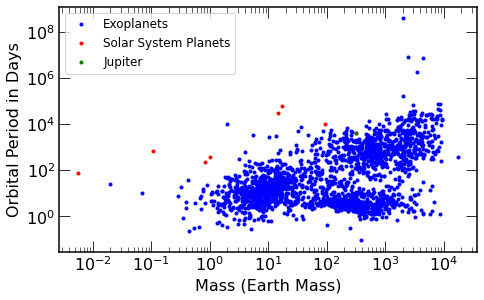

In [7]:
plt.plot(exo["pl_bmasse"], exo["pl_orbper"], "b.", label='Exoplanets')
plt.plot(Plant["m"], Plant['P'], "r.", label='Solar System Planets')
plt.plot(JupiterB["m"], JupiterB['P'], "g.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mass (Earth Mass)")
plt.ylabel("Orbital Period in Days")
plt.legend(loc='best', prop={'size': 12})

## Mass V Semi-Major Axis

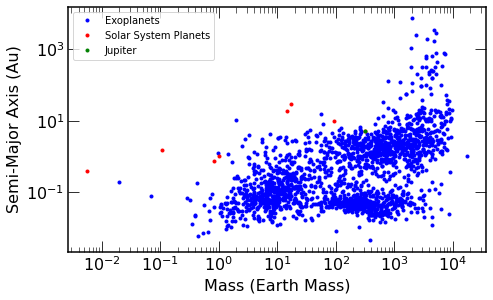

In [8]:
plt.plot(exo["pl_bmasse"], exo["pl_orbsmax"], "b.", label='Exoplanets')
plt.plot(Plant["m"], Plant['au'], "r.", label='Solar System Planets')
plt.plot(JupiterB["m"], JupiterB['au'], "g.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mass (Earth Mass)")
plt.ylabel("Semi-Major Axis (Au)")
plt.legend(loc='best', prop={'size': 10})

## Radius V Period

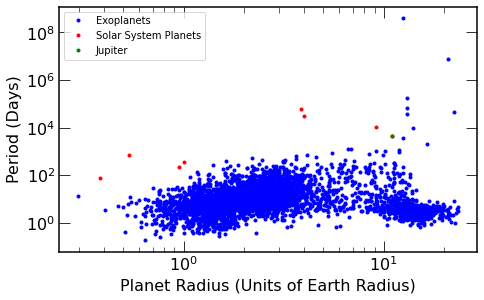

In [9]:
plt.plot(exo["pl_rade"], exo["pl_orbper"], "b.", label='Exoplanets')
plt.plot(Plant["r"], Plant['P'], "r.", label='Solar System Planets')
plt.plot(JupiterB["r"], JupiterB['P'], "g.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Planet Radius (Units of Earth Radius)")
plt.ylabel("Period (Days)")
plt.legend(loc='best', prop={'size': 10})

## Radius V Semi-Major Axis

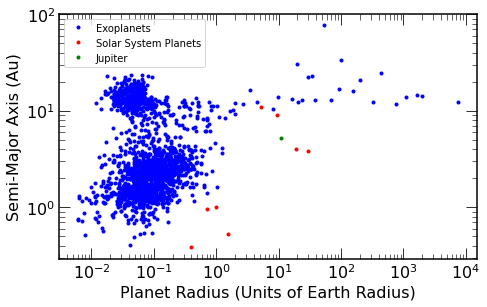

In [10]:
plt.plot(exo["pl_orbsmax"], exo["pl_rade"], "b.", label='Exoplanets')
plt.plot(Plant["au"], Plant['r'], "r.", label='Solar System Planets')
plt.plot(JupiterB["r"], JupiterB['au'], "g.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Planet Radius (Units of Earth Radius)")
plt.ylabel("Semi-Major Axis (Au)")
plt.legend(loc='best', prop={'size': 10})

## 3. Exoplanets by Detection Type & Limits with Sources

In [11]:
# Astrometry: .24ME and set Mp = 4pi^2r^3/Gt^2Ms
#     https://arxiv.org/pdf/2202.06301.pdf
# Direct Imaging: In file
#     https://arxiv.org/pdf/2011.07075.pdf
#     https://hal.science/hal-03585889/file/staa3579.pdf
# Microlensing: SMAmin = .4AU
#     https://arxiv.org/pdf/1810.02691.pdf
# Radial Velocity: Mp= Kmin * Ms * (a/G*Ms) ** (1/2) Kmin = .5 m/s
#     Notebook example (Plot mass of planet in terms of mass of star and add line)
# Transit: D = Rp ** 2/ Rs ** 2 Dmin = .1% (Plot Rp ** 2 v Rs ** 2 and add line)
#     https://www.aanda.org/articles/aa/pdf/2019/03/aa34672-18.pdf

In [12]:
RV = exo[exo['discoverymethod'] == 'Radial Velocity']
IM = exo[exo['discoverymethod'] == 'Imaging']
GL = exo[exo['discoverymethod'] == 'Microlensing']
TR = exo[exo['discoverymethod'] == 'Transit']
AS = exo[exo['discoverymethod'] == 'Astrometry']

## Radial Velocity

In [13]:
sma_arr = 10.0**(np.arange(6)-2.5) * u.AU
m_p_arr = 0.5 * u.meter / u.second * .5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))

print(sma_arr)

[3.16227766e-03 3.16227766e-02 3.16227766e-01 3.16227766e+00
 3.16227766e+01 3.16227766e+02] AU


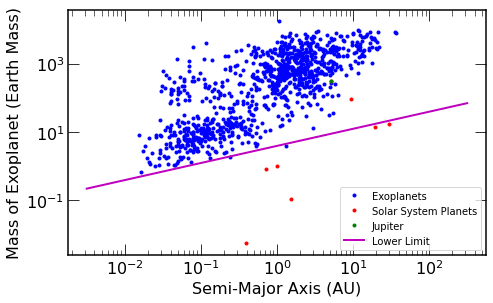

In [14]:
plt.plot(RV["pl_orbsmax"], RV["pl_bmasse"], "b.", label='Exoplanets')
plt.plot(Plant["au"], Plant['m'], "r.", label='Solar System Planets')
plt.plot(JupiterB["au"], JupiterB['m'], "g.", label='Jupiter')
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="m", label='Lower Limit')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Mass of Exoplanet (Earth Mass)")
plt.legend(loc='best', prop={'size': 10})

## Gravitational Microlensing

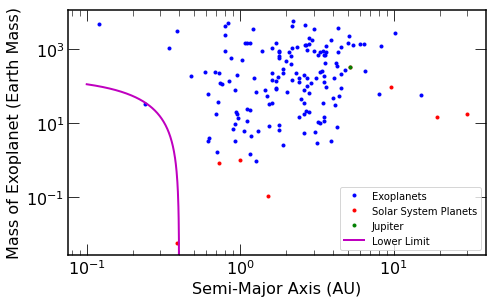

In [15]:
x = np.linspace(0.1, .4, 200)
y = 10e2 * ((-x + .4) ** 1.82)
plt.plot(GL["pl_orbsmax"], GL["pl_bmasse"], "b.", label='Exoplanets')
plt.plot(Plant["au"], Plant['m'], "r.", label='Solar System Planets')
plt.plot(JupiterB["au"], JupiterB['m'], "g.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Mass of Exoplanet (Earth Mass)")
plt.plot(x, y, color='m', label='Lower Limit')
plt.legend(loc='best', prop={'size': 10})
plt.show()

## Transit

In [16]:
TR['st_rad'] = TR['st_rad'] * (109.078080903)

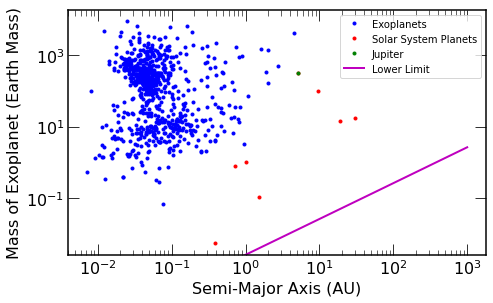

In [17]:
plt.plot(TR["pl_orbsmax"], TR["pl_bmasse"], "b.", label='Exoplanets')
plt.plot(Plant["au"], Plant['m'], "r.", label='Solar System Planets')
plt.plot(JupiterB["au"], JupiterB['m'], "g.", label='Jupiter')
x = np.linspace(0, 1000, 20)
y = ((.000007) ** .5) * x
plt.xscale("log")
plt.plot(x, y, color='m', label='Lower Limit')
plt.yscale("log")
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Mass of Exoplanet (Earth Mass)")
plt.legend(loc='best', prop={'size': 10})

## Astrometry

In [18]:
ASsm = AS["st_mass"].mean()
ASom = AS["pl_orbper"].mean()
print(ASom)
ASsmkg = ASsm * 1.9891e30
print(ASsmkg)

265.375
5.072205e+29


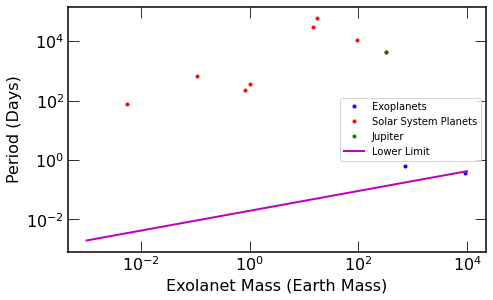

In [19]:
x = np.linspace(.001, 10000, 200)
y = ((.24 * (6.6743e-11) * (ASom ** 3) * x) / (4 * (np.pi ** 2))) ** (1 / 3)
plt.plot(AS["pl_bmasse"], AS["pl_orbsmax"], "b.", label='Exoplanets')
plt.plot(Plant["m"], Plant['P'], "r.", label='Solar System Planets')
plt.plot(JupiterB["m"], JupiterB['P'], "g.", label='Jupiter')
plt.plot(x, y, color='m', label='Lower Limit')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Exolanet Mass (Earth Mass)")
plt.ylabel("Period (Days)")
plt.legend(loc='best', prop={'size': 10})

## Direct Imaging

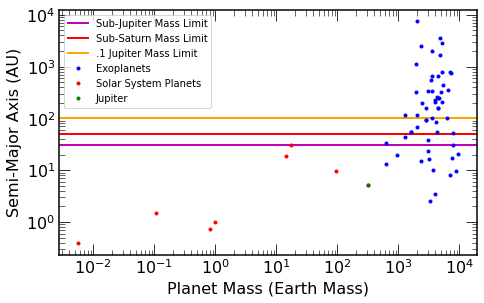

In [20]:
plt.axhline(y = 30, color = 'm', label = 'Sub-Jupiter Mass Limit')
plt.axhline(y = 50, color = 'r', label = 'Sub-Saturn Mass Limit')
plt.axhline(y = 100, color = 'orange', label = '.1 Jupiter Mass Limit')
plt.plot(IM["pl_bmasse"], IM["pl_orbsmax"], "b.", label='Exoplanets')
plt.plot(Plant["m"], Plant['au'], "r.", label='Solar System Planets')
plt.plot(JupiterB["m"], JupiterB['au'], "g.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Planet Mass (Earth Mass)")
plt.ylabel("Semi-Major Axis (AU)")
plt.legend(loc='best', prop={'size': 10})

## 4. A Jupiter-like Planet Around a Sun-like Star

## Radial Velocity

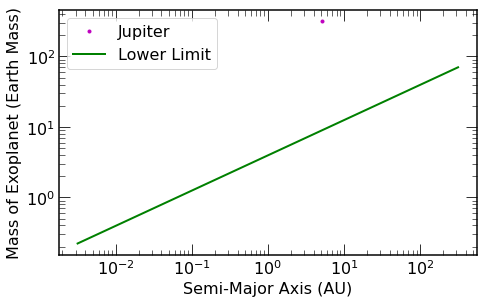

In [21]:
plt.plot(JupiterB["au"], JupiterB['m'], "m.", label='Jupiter')
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="g", label='Lower Limit')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Mass of Exoplanet (Earth Mass)")
plt.legend(loc='best')

## Gravitational Microlensing

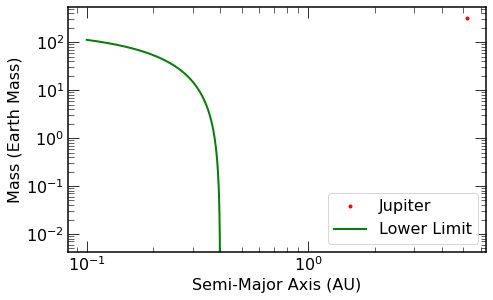

In [22]:
x = np.linspace(0.1, .4, 200)
y = 10e2 * ((-x + .4) ** 1.82)
plt.plot(JupiterB["au"], JupiterB['m'], "r.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Mass (Earth Mass)")
plt.plot(x, y, color='g', label='Lower Limit')
plt.legend(loc='best')
plt.show()

## Transit

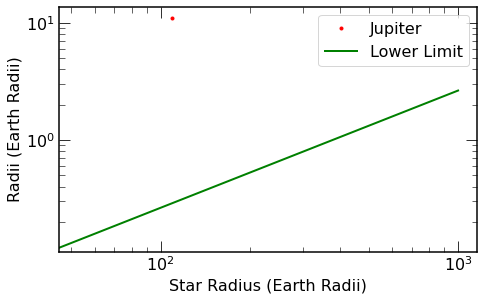

In [23]:
x = np.linspace(0, 1000, 20)
y = ((.000007) ** .5) * x
plt.plot(JupiterB["SR"], JupiterB['r'], "r.", label='Jupiter')
plt.plot(x, y, color='g', label='Lower Limit')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Star Radius (Earth Radii)")
plt.ylabel("Radii (Earth Radii)")
plt.legend(loc='best')

## Astrometry

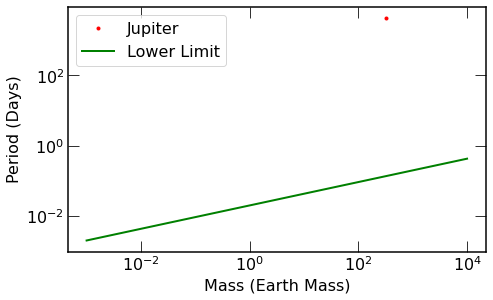

In [24]:
x = np.linspace(.001, 10000, 200)
y = ((.24 * (6.6743e-11) * (ASom ** 3) * x) / (4 * (np.pi ** 2))) ** (1 / 3)
plt.plot(JupiterB["m"], JupiterB['P'], "r.", label='Jupiter')
plt.plot(x, y, color='g', label='Lower Limit')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mass (Earth Mass)")
plt.ylabel("Period (Days)")
plt.legend(loc='best')

## Direct Imaging

AttributeError: 'Line2D' object has no property 'x'

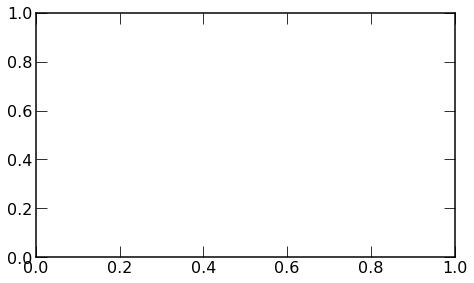

In [25]:
plt.axhline(x = 30, color = 'g', label = 'Sub-Jupiter Mass Limit')
plt.axhline(x = 50, color = 'r', label = 'Sub-Saturn Mass Limit')
plt.axhline(x = 100, color = 'orange', label = '.1 Jupiter Mass Limit')
plt.plot(JupiterB["m"], JupiterB['au'], "r.", label='Jupiter')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Mass (Earth Mass)")
plt.ylabel("Semi-Major Axis(AU)")
plt.legend(loc='best')

## All Together

In [ ]:
ETV = exo[exo['discoverymethod'] == 'Eclipse Timing Variations']
BM = exo[exo['discoverymethod'] == 'Brightness Modulation']

In [ ]:
plt.plot(TR["pl_orbper"], TR["pl_bmasse"], "m.", label='Transits')
plt.plot(RV["pl_orbper"], RV["pl_bmasse"], "g.", label='Radial Velocity')
plt.plot(IM["pl_orbper"], IM["pl_bmasse"], "b.", label='Direct Imaging')
plt.plot(GL["pl_orbper"], GL["pl_bmasse"], "y.", label='Gravitationl Microlensing')
plt.scatter(AS["pl_orbper"], AS["pl_bmasse"], s=10, c="black", label='Astrometry')
plt.scatter(ETV["pl_orbper"], ETV["pl_bmasse"], s=10, c="orange", label='Eclipse Timing Variation')
plt.scatter(BM["pl_orbper"], BM["pl_bmasse"], s=10, c="brown", label='Orbital Brightness Modulation')
plt.plot(Plant["P"], Plant['m'], "r.", label='Solar System Planets')
plt.xscale("log")
plt.yscale("log")
plt.title('Mass - Period Distribution')
plt.xlabel("Period of Planets (Days)")
plt.ylabel("Mass of Planets (Earth Masses)")
plt.legend(loc='best', prop={'size': 10})

In [ ]:
plt.plot(TR["pl_orbper"], TR["pl_rade"], "m.", label='Transits')
plt.plot(RV["pl_orbper"], RV["pl_rade"], "g.", label='Radial Velocity')
plt.plot(IM["pl_orbper"], IM["pl_rade"], "b.", label='Direct Imaging')
plt.plot(GL["pl_orbper"], GL["pl_rade"], "y.", label='Gravitationl Microlensing')
plt.scatter(AS["pl_orbper"], AS["pl_rade"], s=10, c="black", label='Astrometry')
plt.scatter(ETV["pl_orbper"], ETV["pl_rade"], s=10, c="orange", label='Eclipse Timing Variation')
plt.scatter(BM["pl_orbper"], BM["pl_rade"], s=10, c="brown", label='Orbital Brightness Modulation')
plt.plot(Plant["P"], Plant['r'], "r.", label='Solar System Planets')
plt.xscale("log")
plt.yscale("log")
plt.title('Radius - Period Distribution')
plt.xlabel("Period of Planets (Days)")
plt.ylabel("Radii of Planets (Earth Radii)")
plt.legend(loc='best', prop={'size': 10})